In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

2021-11-30 15:37:44.629285: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-11-30 15:37:44.661044: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 15:37:44.661719: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2070 computeCapability: 7.5
coreClock: 1.71GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2021-11-30 15:37:44.662002: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-11-30 15:37:44.664633: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-11-30 15:37:44.666564: I tensorflow/stream_executor/platform/de

# Continuous actions and Tensorboar with Deterministic Policy Gradient (DPG)

In this tutorial we address for first time a problem with continuous actions. We chose the continuous version of Lunar Lander environment for this tutorial. This environment have two actions, both floats in range [-1, 1]. The first action (a_1) controls the main engine, when a_1 < 0 the engine is off and when a_1 > 1 engine is on. The second action (a_2) controls the left and rigth engines. If a_2 in [-1, -0.5] fire left engine, if a_2 in [0.5, 1] fire right engine and if a_2 in [-0.5, 0.5] engines are off.

We also show how to save tensorboard records of the training process. We use the tensorboard funcionality defined by defaul, we introduce how to use customized tensorboard records in further tutorials.

In [2]:
from RL_Problem import rl_problem
from RL_Agent import dpg_agent_continuous
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from RL_Agent.base.utils.networks import networks
from RL_Agent.base.utils import agent_saver, history_utils
import gym

2021-11-30 15:37:44.689617: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-11-30 15:37:44.693738: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 3199980000 Hz
2021-11-30 15:37:44.694081: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562fc68e9820 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-11-30 15:37:44.694093: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-11-30 15:37:44.694228: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 15:37:44.694503: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeF

We define the network architecture using the function "dpg_net" from "RL_Agent.base.utils.networks.networks" which return a dictionary.

In [3]:
net_architecture = networks.dpg_net(dense_layers=2,
                                    n_neurons=[128, 128],
                                    dense_activation=['relu', 'relu'])

We define the agent setting the next parameters:

* learning_rate: learning rate for training the neural network.
* batch_size: Size of the batches used for training the neural network.
* net_architecture: net architecture defined before.
* n_stack: number of stacked timesteps to form the state.
* tensorboard_dir: path to folder for store tensorboard summaries.

If we especify the "tensorboard_dir" param, the agent will record the tensorboard summaries. tensorboard_dir expect a directory path in string format.

In [4]:
agent = dpg_agent_continuous.Agent(learning_rate=1e-3,
                            batch_size=64,
                            n_stack=1,
                            net_architecture=net_architecture,
                            tensorboard_dir='tensorboard_logs')


We chose the LunarLanderContinuous environment from OpenAI Gym.

In [5]:
environment = "LunarLanderContinuous-v2"
environment = gym.make(environment)

Create a RL problem were the comunications between agent and environment are managed. In this case, we use the funcionalities from "RL_Problem.rl_problem" which makes transparent to the user the selection of the matching problem. The function "Problem" automaticaly selects the problem based on the used agent.

In [6]:
problem = rl_problem.Problem(environment, agent)

Next step is solving the RL problem that we have define. Here we specify the number of episodes, the skip_states parameter and additionaly after how many iterations we want to render the environment. 

We do not specify the value of render because it is set to False by default when trainig.

In [7]:
problem.solve(episodes=400, skip_states=3, render_after=190)

2021-11-30 15:37:45.501347: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


Episode:  1 Epochs:  94  Reward: -351.6 Smooth Reward: -351.6  Epsilon: 0.0000
Episode:  2 Epochs:  104  Reward: -126.3 Smooth Reward: -238.9  Epsilon: 0.0000
Episode:  3 Epochs:  86  Reward: -344.2 Smooth Reward: -274.0  Epsilon: 0.0000
Episode:  4 Epochs:  101  Reward: -273.8 Smooth Reward: -274.0  Epsilon: 0.0000
Episode:  5 Epochs:  173  Reward: -498.2 Smooth Reward: -318.8  Epsilon: 0.0000
Episode:  6 Epochs:  137  Reward: -183.5 Smooth Reward: -296.3  Epsilon: 0.0000
Episode:  7 Epochs:  98  Reward: -240.7 Smooth Reward: -288.3  Epsilon: 0.0000
Episode:  8 Epochs:  97  Reward: -366.4 Smooth Reward: -298.1  Epsilon: 0.0000
Episode:  9 Epochs:  116  Reward: -482.6 Smooth Reward: -318.6  Epsilon: 0.0000
Episode:  10 Epochs:  205  Reward: -604.1 Smooth Reward: -347.1  Epsilon: 0.0000
Episode:  11 Epochs:  180  Reward: -616.0 Smooth Reward: -373.6  Epsilon: 0.0000
Episode:  12 Epochs:  143  Reward: -263.1 Smooth Reward: -387.3  Epsilon: 0.0000
Episode:  13 Epochs:  85  Reward: -406.1 

Episode:  106 Epochs:  107  Reward: -104.5 Smooth Reward: -131.7  Epsilon: 0.0000
Episode:  107 Epochs:  90  Reward: -129.4 Smooth Reward: -131.2  Epsilon: 0.0000
Episode:  108 Epochs:  52  Reward: -137.7 Smooth Reward: -129.9  Epsilon: 0.0000
Episode:  109 Epochs:  74  Reward: -200.7 Smooth Reward: -134.0  Epsilon: 0.0000
Episode:  110 Epochs:  106  Reward: -221.9 Smooth Reward: -146.1  Epsilon: 0.0000
Episode:  111 Epochs:  95  Reward: -286.6 Smooth Reward: -158.9  Epsilon: 0.0000
Episode:  112 Epochs:  80  Reward: -187.0 Smooth Reward: -163.8  Epsilon: 0.0000
Episode:  113 Epochs:  81  Reward: -189.7 Smooth Reward: -172.2  Epsilon: 0.0000
Episode:  114 Epochs:  84  Reward: -154.0 Smooth Reward: -175.9  Epsilon: 0.0000
Episode:  115 Epochs:  96  Reward: -140.9 Smooth Reward: -175.2  Epsilon: 0.0000
Episode:  116 Epochs:  74  Reward: -215.1 Smooth Reward: -186.3  Epsilon: 0.0000
Episode:  117 Epochs:  124  Reward: -210.2 Smooth Reward: -194.4  Epsilon: 0.0000
Episode:  118 Epochs:  71

Episode:  208 Epochs:  71  Reward: -80.8 Smooth Reward: -123.8  Epsilon: 0.0000
Episode:  209 Epochs:  121  Reward: -347.8 Smooth Reward: -135.2  Epsilon: 0.0000
Episode:  210 Epochs:  76  Reward: -84.5 Smooth Reward: -126.8  Epsilon: 0.0000
Episode:  211 Epochs:  128  Reward: -242.5 Smooth Reward: -135.2  Epsilon: 0.0000
Episode:  212 Epochs:  87  Reward: -125.7 Smooth Reward: -137.9  Epsilon: 0.0000
Episode:  213 Epochs:  83  Reward: -170.5 Smooth Reward: -148.1  Epsilon: 0.0000
Episode:  214 Epochs:  74  Reward: -85.3 Smooth Reward: -158.9  Epsilon: 0.0000
Episode:  215 Epochs:  57  Reward: -100.5 Smooth Reward: -151.3  Epsilon: 0.0000
Episode:  216 Epochs:  72  Reward: -55.3 Smooth Reward: -149.9  Epsilon: 0.0000
Episode:  217 Epochs:  84  Reward: -122.9 Smooth Reward: -141.6  Epsilon: 0.0000
Episode:  218 Epochs:  119  Reward: -82.8 Smooth Reward: -141.8  Epsilon: 0.0000
Episode:  219 Epochs:  100  Reward: -166.9 Smooth Reward: -123.7  Epsilon: 0.0000
Episode:  220 Epochs:  103  R

Episode:  310 Epochs:  72  Reward: -141.2 Smooth Reward: -124.5  Epsilon: 0.0000
Episode:  311 Epochs:  77  Reward: -85.6 Smooth Reward: -121.8  Epsilon: 0.0000
Episode:  312 Epochs:  58  Reward: -116.6 Smooth Reward: -116.2  Epsilon: 0.0000
Episode:  313 Epochs:  86  Reward: -121.8 Smooth Reward: -116.5  Epsilon: 0.0000
Episode:  314 Epochs:  107  Reward: -125.4 Smooth Reward: -121.9  Epsilon: 0.0000
Episode:  315 Epochs:  64  Reward: -99.0 Smooth Reward: -115.8  Epsilon: 0.0000
Episode:  316 Epochs:  89  Reward: -118.4 Smooth Reward: -110.0  Epsilon: 0.0000
Episode:  317 Epochs:  57  Reward: -90.8 Smooth Reward: -110.3  Epsilon: 0.0000
Episode:  318 Epochs:  59  Reward: -108.4 Smooth Reward: -113.9  Epsilon: 0.0000
Episode:  319 Epochs:  69  Reward: -129.7 Smooth Reward: -113.7  Epsilon: 0.0000
Episode:  320 Epochs:  94  Reward: -128.3 Smooth Reward: -112.4  Epsilon: 0.0000
Episode:  321 Epochs:  87  Reward: -120.2 Smooth Reward: -115.9  Epsilon: 0.0000
Episode:  322 Epochs:  63  Rew

Runing the agent in exploitation mode over the environment to see the final performance.

In [8]:
problem.test(n_iter=4, render=True)

Test episode:  1 Epochs:  87  Reward: -70.0 Smooth Reward: -70.0  Epsilon: 0.0000
Test episode:  2 Epochs:  83  Reward: -29.2 Smooth Reward: -49.6  Epsilon: 0.0000
Test episode:  3 Epochs:  124  Reward: -69.1 Smooth Reward: -56.1  Epsilon: 0.0000
Test episode:  4 Epochs:  125  Reward: -127.6 Smooth Reward: -74.0  Epsilon: 0.0000


Lets see the tensorboard logs. Next cell executes the command that runs the tensorboard service. To see the result you have to open a tab in your browser on the url that the command shows, usually http://localhost:6006/

In [9]:
!tensorboard --logdir=tensorboard_logs

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


Lets see the reward history as usual. In order to execute the next cell you will need to stop the execution of the cell avobe.

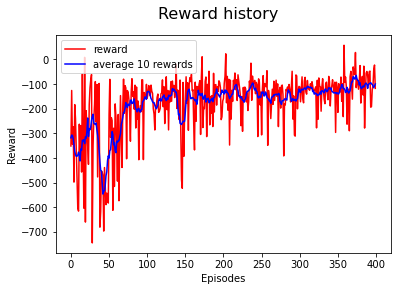

In [10]:
hist = problem.get_histogram_metrics()
history_utils.plot_reward_hist(hist, 10)

In [ ]:
agent_saver.save(agent, 'agent_dpg_lunar.json')